# EDA on 🛣️ SDOT - Vechicle Collision

Last time, we explored univariate data visualizations using various charts and plots to understand individual features in the dataset.

Now, let’s take it a step further with bivariate and multivariate analysis to uncover deeper insights and relationships between multiple variables. This will help us understand how different factors interact and contribute to vehicle collisions in Seattle.

## 1. 📚 Importing Libraries

To begin our analysis and visualization, we’ll import the essential Python libraries.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 2. 📂 Load & Preview the Data

Since we previously cleaned and transformed the data 🧹, this version should be much easier to work with — with fewer missing values, clearer columns, and ready for some insightful Exploratory Data Analysis (EDA)!

In [2]:
# Download the cleaned dataset
!gdown https://drive.google.com/file/d/1VIlAl08S1N_-wyYSxw1AuBDiiXr-sN7u/view?usp=sharing --fuzzy

Downloading...
From: https://drive.google.com/uc?id=1VIlAl08S1N_-wyYSxw1AuBDiiXr-sN7u
To: /home/jagannath/fuseAi/week_4_data_visualization/bivariate_analysis/SDOT_Collisions_2019_24.csv
100%|██████████████████████████████████████| 6.29M/6.29M [00:00<00:00, 10.3MB/s]


In [3]:
# Load data
df = pd.read_csv(
    "SDOT_Collisions_2019_24.csv",
    low_memory=False    # Prioritize type consistency over memory optimization while loading
)

# View first 5 rows in a dataframe
df.head(3)

OBJECTID      ADDRTYPE                                           LOCATION  \
0   6452334         Block      E BOSTON ST BETWEEN 14TH AVE E AND 15TH AVE E   
1   6452335  Intersection          ARBORETUM DR E AND LAKE WASHINGTON BLVD E   
2   6452338         Block  S MICHIGAN ST BETWEEN EAST MARGINAL WAY S AND ...   

  SEVERITYCODE COLLISIONTYPE  PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  \
0            1         Other            1         0            0         1   
1            1    Rear Ended            2         0            0         2   
2            1     Sideswipe            3         0            0         2   

   INJURIES  ...  UNDERINFL  WEATHER ROADCOND                LIGHTCOND  \
0         0  ...          N    Clear      Wet  Dark - Street Lights On   
1         0  ...          N    Clear      Dry                 Daylight   
2         0  ...          N    Clear      Dry                 Daylight   

  SPEEDING             x              y MONTH  YEAR   TIMEOFDAY  
0        Y  1.275366e+06  236187.648934    12  2022  Late Night  
1        N  1.280244e+06  232549.364834     1  2023     Morning  
2        N  1.270689e+06  202435.972355     9  2023        Noon  

[3 rows x 23 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31620 entries, 0 to 31619
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OBJECTID         31620 non-null  int64  
 1   ADDRTYPE         31560 non-null  object 
 2   LOCATION         31472 non-null  object 
 3   SEVERITYCODE     31620 non-null  object 
 4   COLLISIONTYPE    31620 non-null  object 
 5   PERSONCOUNT      31620 non-null  int64  
 6   PEDCOUNT         31620 non-null  int64  
 7   PEDCYLCOUNT      31620 non-null  int64  
 8   VEHCOUNT         31620 non-null  int64  
 9   INJURIES         31620 non-null  int64  
 10  SERIOUSINJURIES  31620 non-null  int64  
 11  FATALITIES       31620 non-null  int64  
 12  JUNCTIONTYPE     31322 non-null  object 
 13  UNDERINFL        31620 non-null  object 
 14  WEATHER          31513 non-null  object 
 15  ROADCOND         31589 non-null  object 
 16  LIGHTCOND        31524 non-null  object 
 17  SPEEDING    

## [About SOTD Data](https://www.seattle.gov/documents/Departments/SDOT/GIS/Collisions_OD.pdf)

| Attribute         | Description                                                 |
|-------------------|-------------------------------------------------------------|
| ADDRTYPE          | Collision address type: __Alley__, __Block__, __Intersection__          |
| LOCATION          | Description of the general location of the collision         |
| SEVERITYCODE      | A code that corresponds to the severity of the collision: __`3`—fatality__, __`2b`—serious injury__, __`2`—injury__, __`1`—prop damage__, __`0`—unknown__ |
| COLLISIONTYPE     | Collision type                                              |
| PERSONCOUNT       | The total number of people involved in the collision        |
| PEDCOUNT          | The number of pedestrians involved in the collision         |
| PEDCYLCOUNT       | The number of bicycles involved in the collision            |
| VEHCOUNT          | The number of vehicles involved in the collision            |
| INJURIES          | The number of total injuries in the collision               |
| SERIOUSINJURIES  | The number of serious injuries in the collision             |
| FATALITIES        | The number of fatalities in the collision                   |
| JUNCTIONTYPE      | Category of junction at which collision took place          ||
| UNDERINFL         | Whether or not a driver involved was under the influence of drugs or alcohol |
| WEATHER           | A description of the weather conditions during the time of the collision |
| ROADCOND          | The condition of the road during the collision              |
| LIGHTCOND         | The light conditions during the collision                   |
| SPEEDING          | Whether or not speeding was a factor in the collision (Y/N) |


## 3. Data Visualization

Now that we’ve explored variables individually, it’s time to see how two variables and more interact together!

### 3.2 📊  Bivariate Analysis

**Bivariate analysis** helps us understand relationships and patterns between pairs of features — for example, how the number of vehicles involved changes across different years, or how collision severity varies by month.

This stage is crucial because many insights emerge only when we look at how variables influence each other, revealing trends, correlations, or group differences that aren’t visible from univariate views alone.

#### 3.2.1 Bar & PIe Chart

> To keep things **efficient**, **readable**, and **reusable**, we’re going to *functionize* our plotting logic. Instead of repeating the same code blocks over and over, we'll wrap them into neat functions — so we can focus more on insights and less on code clutter.

In [5]:
def visualize_bar_plot(df, x_variable, hue_variable, title, horizontal=False):
    fig, ax = plt.subplots(figsize=(15, 5) if not horizontal else (10, 5))

    if not horizontal:
        sns.countplot(data=df, x=x_variable, hue=hue_variable, ax=ax)
    else:
        sns.countplot(data=df, y=x_variable, hue=hue_variable, ax=ax)

    ax.set_title(title, fontsize=18)
    ax.set_xlabel(x_variable if not horizontal else 'Count', fontsize=14)
    ax.set_ylabel("Count" if not horizontal else x_variable, fontsize=14)
    plt.legend(title=hue_variable, fontsize=10)
    plt.tight_layout()
    plt.show()

In [6]:
def visualize_pie_chart(df, x_variable, hue_variable, title, pie_radius=1):
    counts = df.groupby([x_variable, hue_variable]).size().unstack(fill_value=0)

    num_categories = len(counts.index)
    fig, axes = plt.subplots(1, num_categories, figsize=(5*num_categories, 6))

    for i, category in enumerate(counts.index):
        ax = axes[i] if num_categories > 1 else axes

        # Get values for this pie chart
        values = counts.loc[category]

        explode = [0.1 if v == max(values) else 0 for v in values]

        ax.pie(
            values,
            labels=counts.columns,
            autopct='%1.1f%%',
            startangle=140,
            explode=explode,
            radius=pie_radius,
            textprops={'fontsize': 18}
        )
        ax.set_xlabel(category, fontsize=20)

    fig.suptitle(title, fontsize=20)
    plt.tight_layout()
    plt.show()

**🚨 Visualizing the Distribution of Accidents occured by Time of Day & Severity Level**


In [7]:
severity_map = {
    '3': 'Fatality',
    '2b': 'Serious Injury',
    '2': 'Injury',
    '1': 'Property Damage'
}

# Make sure SEVERITYCODE is treated as string for mapping
df['SEVERITYCODE'] = df['SEVERITYCODE'].astype(str)

# Map the codes to descriptions and create the new column
df['SEVERITYDESC'] = df['SEVERITYCODE'].map(severity_map)

##### 📊 What does `crosstab()` do?

`pandas.crosstab()` is a super useful function for bivariate analysis. It creates a **cross-tabulation** (contingency table) — basically a table that shows the **frequency** (count) of combinations between two (or more) categorical variables.

In [8]:
pd.crosstab(df.TIMEOFDAY, df.SEVERITYDESC)

SEVERITYDESC   Fatality  Injury  Property Damage  Serious Injury
TIMEOFDAY                                                       
Early Morning        12    1315             2631              84
Evening              37    2391             4128             244
Late Night           22     730             2068             140
Morning              13    2071             4160             121
Night                23     992             2142             135
Noon                 23    2935             4973             230

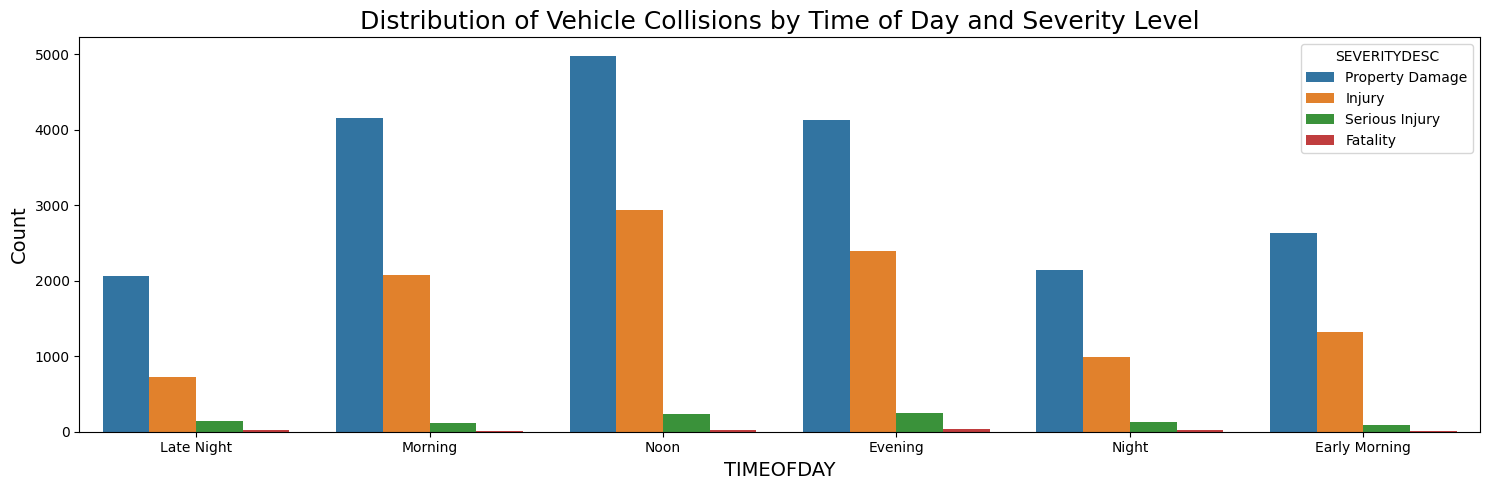

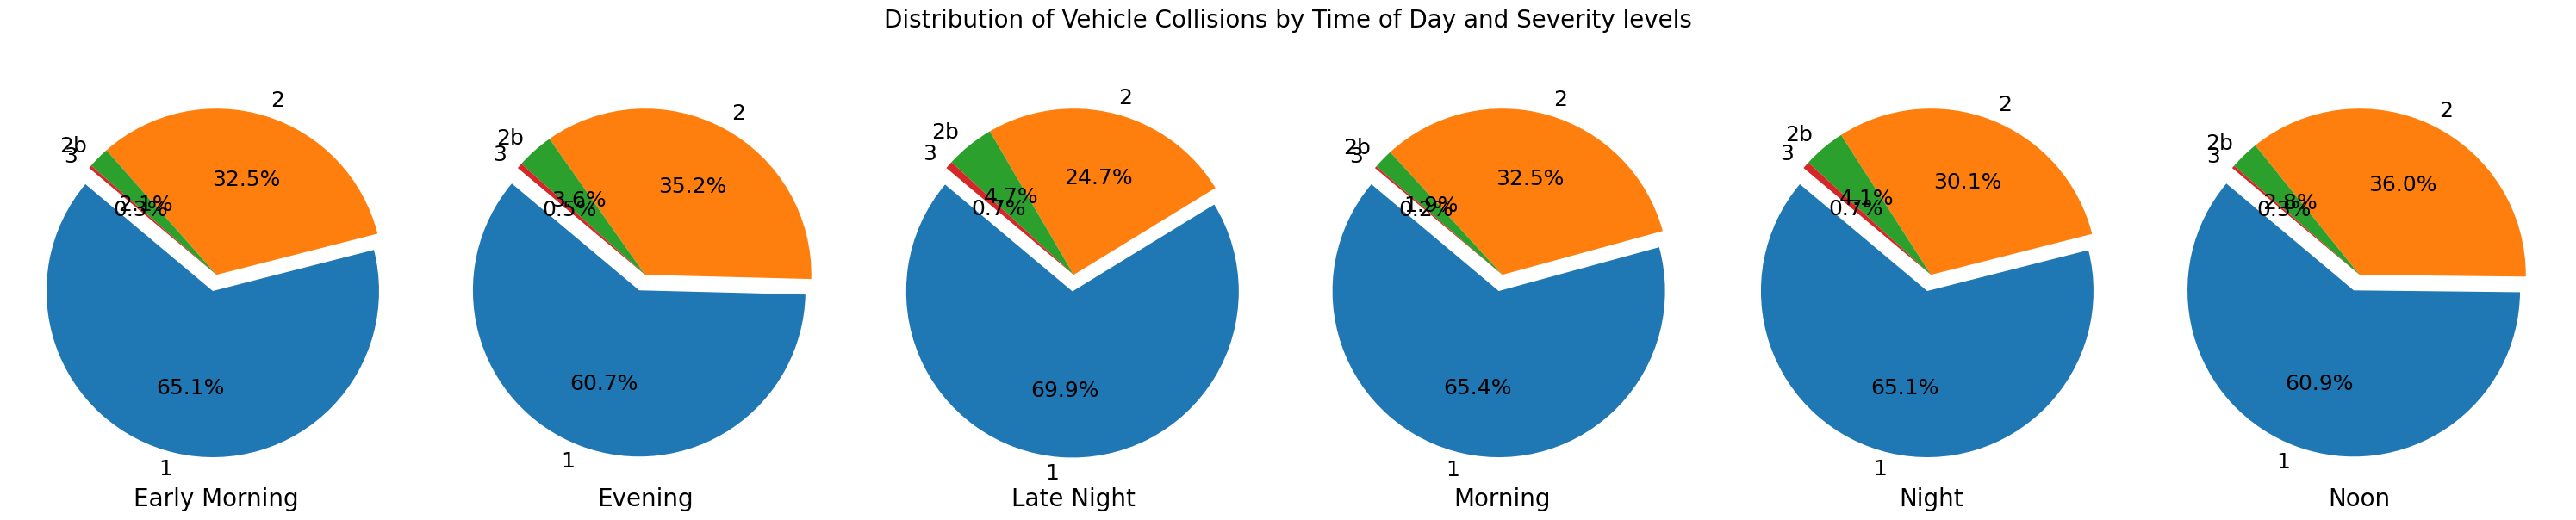

In [9]:
visualize_bar_plot(df, "TIMEOFDAY", "SEVERITYDESC", "Distribution of Vehicle Collisions by Time of Day and Severity Level")
visualize_pie_chart(df, "TIMEOFDAY", "SEVERITYCODE", "Distribution of Vehicle Collisions by Time of Day and Severity levels")

 - Most crashes happen during the day, with afternoons seeing the highest number.

- Nighttime has the fewest crashes overall.

Even though severe crashes are less common, they follow a similar pattern, happening most in evening followed by afternoon.

- The largest slice corresponds to __property damage collisions__ then followed by injury collisions, fatality collisions, serious injuries related collisions and fatality collisions.

- Looking at Pie Chart, it seeems late night is the highest for property related collisions.

> Note: Bar charts typically represent the total count for each category, while pie charts show the individual distribution of counts across categories as proportions of the whole (percentages).

**🚨 Visualizing the Distribution of Accidents Under Influence conditions & Time of Day**


In [10]:
df['UNDERINFL'].value_counts()

UNDERINFL
N    31060
Y      560
Name: count, dtype: int64

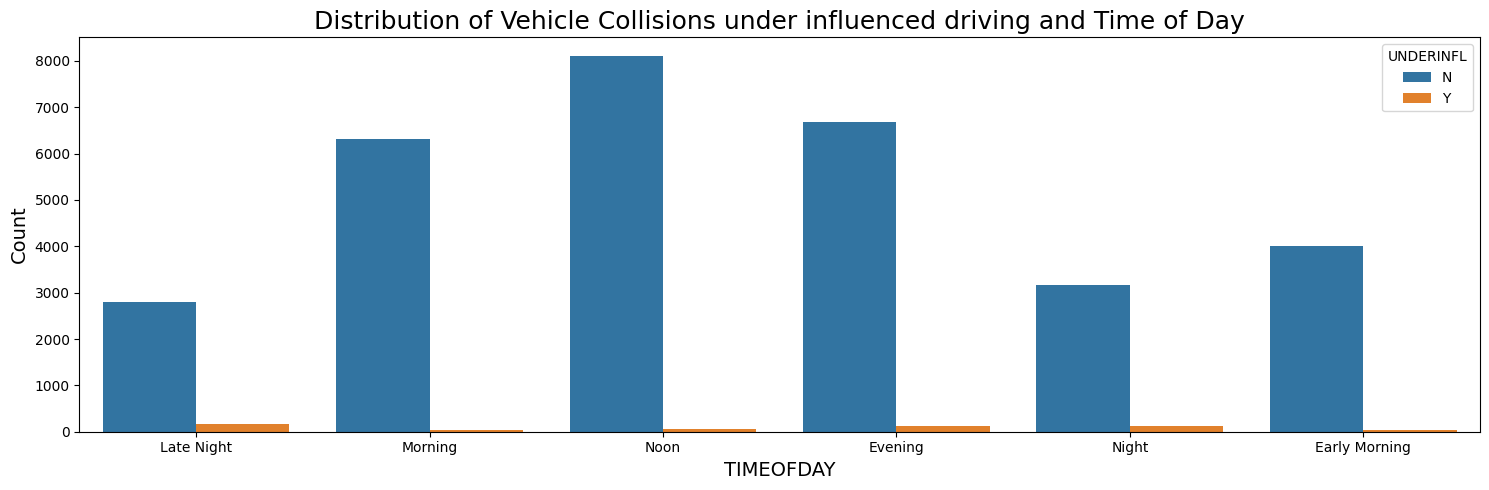

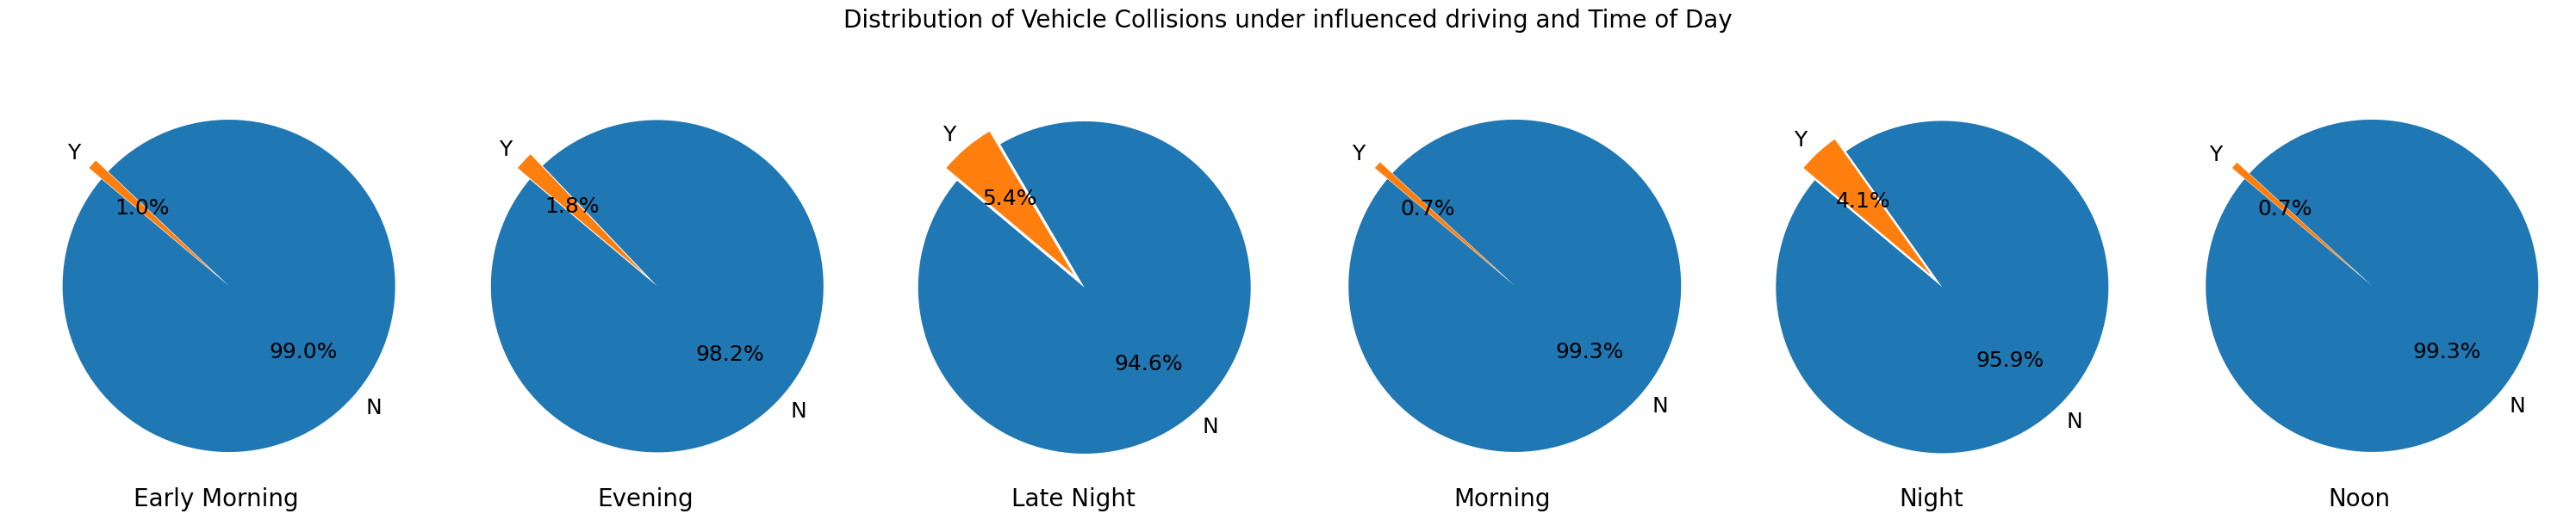

In [11]:
# Create count plots for time of day and under influenced conditions
visualize_bar_plot(df, "TIMEOFDAY", "UNDERINFL", "Distribution of Vehicle Collisions under influenced driving and Time of Day")
visualize_pie_chart(df, "TIMEOFDAY", "UNDERINFL", "Distribution of Vehicle Collisions under influenced driving and Time of Day")

- The data suggests that DUI (Driving Under Influence) collisions are most frequent at night and late night (between 8pm - 4am).
- Compared to night time, DUI collisions appear to be less frequent during the day.


### 3.2.2 Box Plot

A box plot (also called a box-and-whisker plot) is a standardized way of displaying the distribution of a dataset based on five key summary statistics:

* Minimum (excluding outliers)
* First Quartile (Q1) – 25th percentile
* Median (Q2) – 50th percentile
* Third Quartile (Q3) – 75th percentile
* Maximum (excluding outliers)

```
    |--------[===========|---------]--------|
   min      Q1        Q2/median    Q3       max

```
Where,

* `Q1` = 25th percentile
* `Q2` = 50th percentile (median)
* `Q3` = 75th percentile
* `IQR` = Interquartile Range = Q3 - Q1
* The box spans from Q1 to Q3
* A line inside the box represents the **median (Q2)**
* Whiskers usually extend to:

  * **Q1 - 1.5 \* IQR** (lower bound)
  * **Q3 + 1.5 \* IQR** (upper bound)
* Any data points outside this range are plotted as **outliers (dots or stars)**

**🚨 Visualizing the Box Plot of Vechicle related Accidents by Severity Levels**



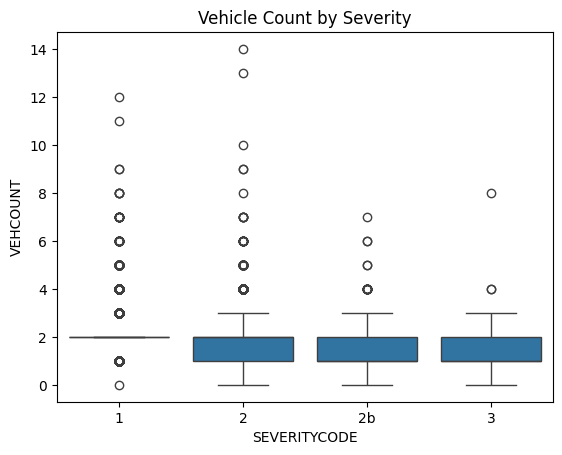

In [12]:
# Severity vs. Number of Vehicles
sns.boxplot(x='SEVERITYCODE', y='VEHCOUNT', data=df)
plt.title('Vehicle Count by Severity')
plt.show()

* **🟦 Property Damage Collisions (Severity 1)**
  These tend to involve **fewer vehicles on average**, but surprisingly, they're also responsible for **the most extreme outliers** — cases with a **very high number of vehicles**.

* **🟨 Injury Collisions (Severity 2, 2b)**
  The **median vehicle count creeps up** slightly with severity, suggesting that **injury-causing crashes tend to involve more vehicles**, but the **range is tighter**.

  > This implies **less variability** — perhaps **standard two-vehicle collisions** causing injury are more common here.

* **🟥 Fatal Collisions (Severity 3)**
  Despite the severity, **fatal crashes don’t necessarily involve many vehicles**.

  > This reflects the **violent nature of high-risk behavior (e.g., speeding, DUI)** — a **single bad decision** in a **low-vehicle setting** can still be deadly.

* **📉 A Tighter Spread at Higher Severities**
  The **boxes and whiskers** become more **compact** as severity increases.

  > High-severity collisions are more **predictable in vehicle count**, with **less randomness** compared to property damage cases.

**Key Insight:**

_More vehicles ≠ more severe crash_

High vehicle counts more often result in **non-injury, property-only collisions**, possibly due to **low-speed urban congestion** scenarios.


### 3.2.3 Line Plot

**🚨 Visualizing using line plot for Accident Severity Distribution Over Years & Months**

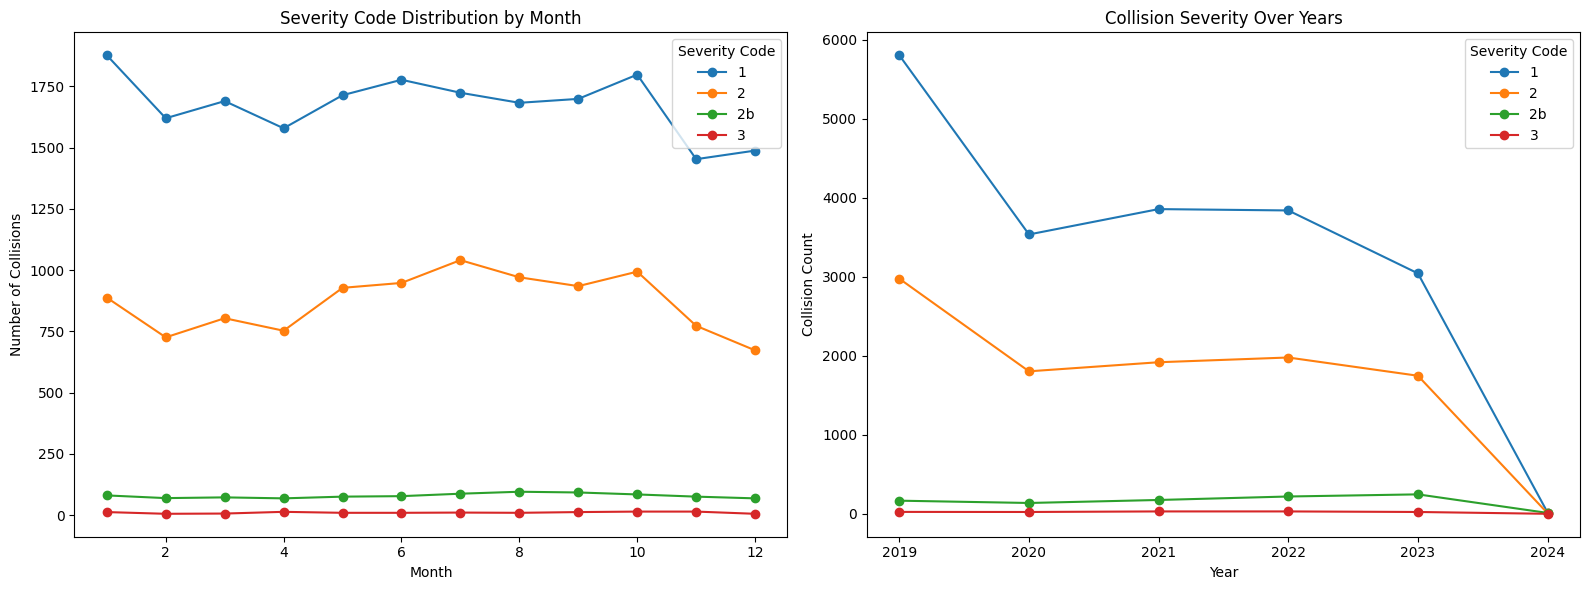

In [13]:
# Grouping
monthly = df.groupby('MONTH')['SEVERITYCODE'].value_counts().unstack().fillna(0)
yearly = df.groupby('YEAR')['SEVERITYCODE'].value_counts().unstack().fillna(0)

# Create subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Monthly plot
monthly.plot(kind='line', marker='o', ax=axes[0])
axes[0].set_title('Severity Code Distribution by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Collisions')
axes[0].legend(title='Severity Code')

# Yearly plot
yearly.plot(kind='line', marker='o', ax=axes[1])
axes[1].set_title('Collision Severity Over Years')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Collision Count')
axes[1].legend(title='Severity Code')

plt.tight_layout()
plt.show()

**Left Plot: Severity Code Distribution by Month**

* Throughout the year, Severity Code 1 collisions remain the most frequent. This suggests that minor incidents are a consistent issue regardless of the season.

* Given Seattle's reputation for rain, the slight increase in Severity Code 2 collisions observed in the late fall and winter months (around November, December, and potentially extending into January/February, though not perfectly clear from the plot without precise month labels) could be linked to the more challenging driving conditions. Wet roads reduce traction, increase stopping distances, and can contribute to more injury-causing accidents.

* The lack of a significant spike in Severity Code 1 during the drier summer months (June-August) suggests that while better weather might reduce some risks, minor collisions remain common due to other factors like traffic density.

* The consistently low numbers for Serious Injury (2b) and Fatality (3) across all months in Seattle suggest that while weather is a contributing factor to overall collision rates, these severe outcomes are thankfully rare and might be more strongly influenced by factors like high-risk driving behaviors (speeding, impairment) rather than just typical Seattle weather.

**Right Plot: Collision Severity Over Years**

* The most striking feature across all severity codes (Blue, Orange, Green, and Red lines) is the substantial decrease in the number of collisions in 2020. This aligns strongly with the period of widespread lockdowns, stay-at-home orders, and reduced travel due to the COVID-19 pandemic. With fewer vehicles on the road, the overall number of collisions, regardless of severity, understandably declined.

* Following the sharp drop in 2020, the number of collisions for Severity Codes 1 and 2 shows a gradual increase in 2021 and 2022. This likely reflects the easing of restrictions, increased vaccination rates, and a return to more normal levels of commuting and travel as the initial phases of the pandemic subsided.

> Note: The data for 2024 is incomplete and not yet fully reported.

### 3.2.4 Stacked Area Plot

A **stacked area plot** is a type of line chart where multiple data series are **stacked on top of each other**, showing how each contributes to the total over time or another continuous variable (like months, years, etc.).

**Best Used For:**

* **Time series data** with multiple categories.
* Understanding how **parts make up a whole** over time.

**🚨 Visualizing Monthly Collision Severity Trends**


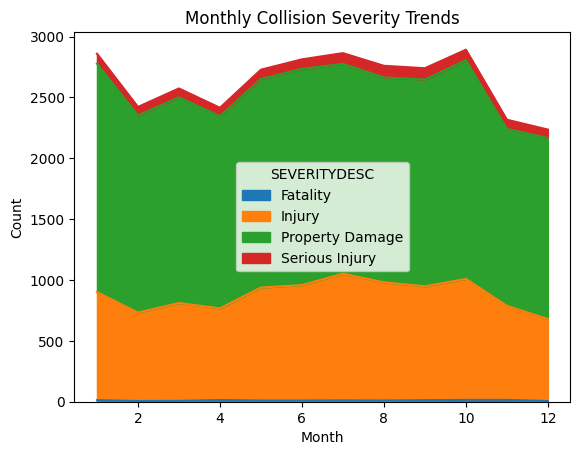

In [ ]:
monthly_severity = df.groupby(['MONTH', 'SEVERITYDESC']).size().unstack()
monthly_severity.plot.area()
plt.title('Monthly Collision Severity Trends')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

The plot highlights that property damage is the most common outcome of collisions across all months, followed by injury. Serious injuries and fatalities are less frequent but show some monthly variation. The total number of collisions also varies throughout the year, suggesting potential temporal patterns.

### 3.3 🔍 Multivariate Analysis

**Multivariate analysis** takes things a step further by exploring the relationships between **three or more variables** at once. This helps us uncover more **complex patterns** and **interactions** that aren’t visible in simple pairwise comparisons.

For example, we might explore how **collision severity** varies across **weather conditions** *and* **road conditions**, or how **speeding**, **light conditions**, and **injuries** collectively influence the outcome of a crash.


#### 3.3.1 Bar & Pie Chart

**🚨 Visualizing the Distribution of Vechicle Accidents under Influence by Month and Severity Levels**

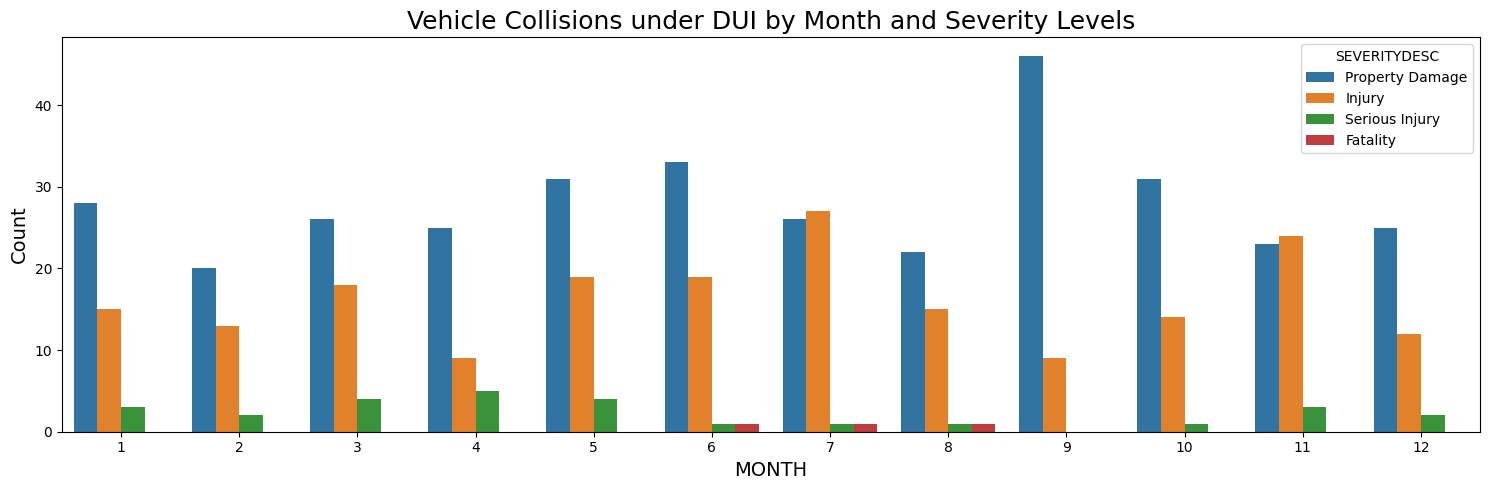

In [ ]:
visualize_bar_plot(df[df["UNDERINFL"]=="Y"],
                   "MONTH", "SEVERITYDESC",
                   "Vehicle Collisions under DUI by Month and Severity Levels")


* Property damage is the most frequent DUI collision outcome across all months.

* Sept. and Oct. month show a peak in property damage collisions.
* Injury collision trends generally follow the property damage trends.
* Serious injuries and fatalities are less frequent but vary by month.

**🚨 Visualizing the Distribution of Speeding Vechicle Accidents under Road Conditions and Severity Levels**

In [ ]:
speeding_df = df[df["SPEEDING"] == "Y"]
print("Total data when speeding = 'Y':", len(speeding_df))
speeding_df.sample(3)

Total data when speeding = 'Y': 1780


OBJECTID      ADDRTYPE  \
15242   6678408         Block   
21620   6687163         Block   
12891   6675203  Intersection   

                                                LOCATION SEVERITYCODE  \
15242        1ST AV S BR NB BETWEEN POINT A AND SR509 NB            2   
21620  ELLIOTT AVE W BETWEEN W LEE ST AND W GALER ST ...            2   
12891                       62ND AVE S AND S PRENTICE ST            1   

      COLLISIONTYPE  PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  INJURIES  \
15242    Rear Ended            2         0            0         2         1   
21620     Sideswipe            2         0            0         2         2   
12891        Angles            2         0            0         2         0   

       ...  WEATHER  ROADCOND                LIGHTCOND SPEEDING             x  \
15242  ...    Clear       Dry                 Daylight        Y  1.269603e+06   
21620  ...    Clear       Dry  Dark - Street Lights On        Y  1.260582e+06   
12891  ...    Clear       Dry                 Daylight        Y  1.288847e+06   

                   y MONTH  YEAR   TIMEOFDAY     SEVERITYDESC  
15242  200554.155713     9  2020     Morning           Injury  
21620  233927.849444     1  2022  Late Night           Injury  
12891  188626.018933     8  2020        Noon  Property Damage  

[3 rows x 24 columns]

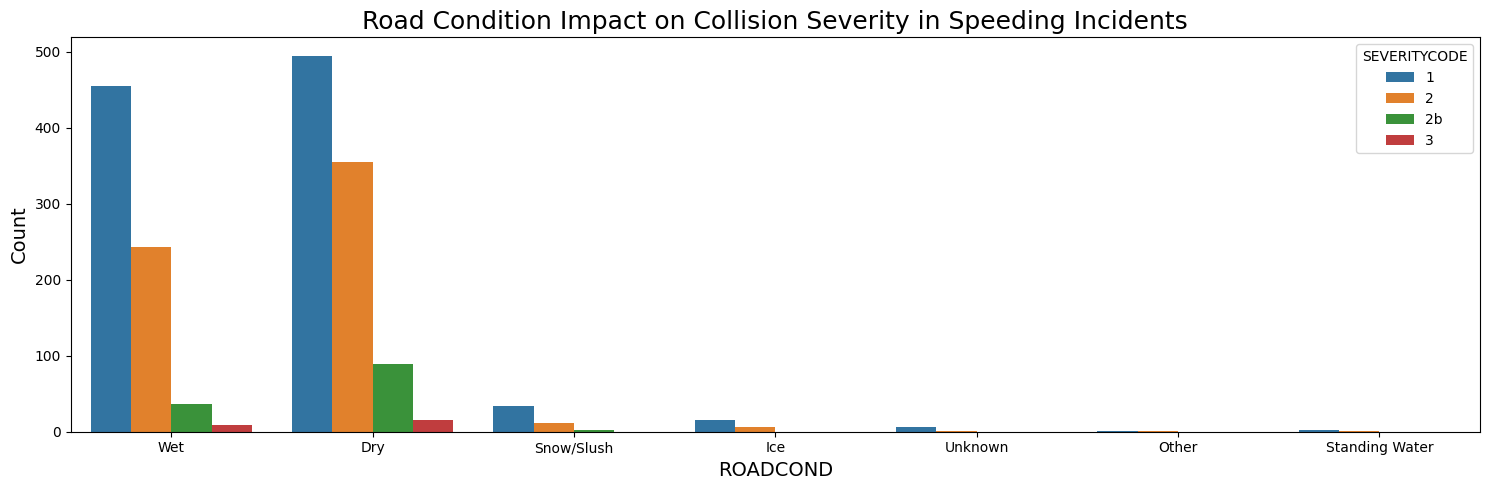

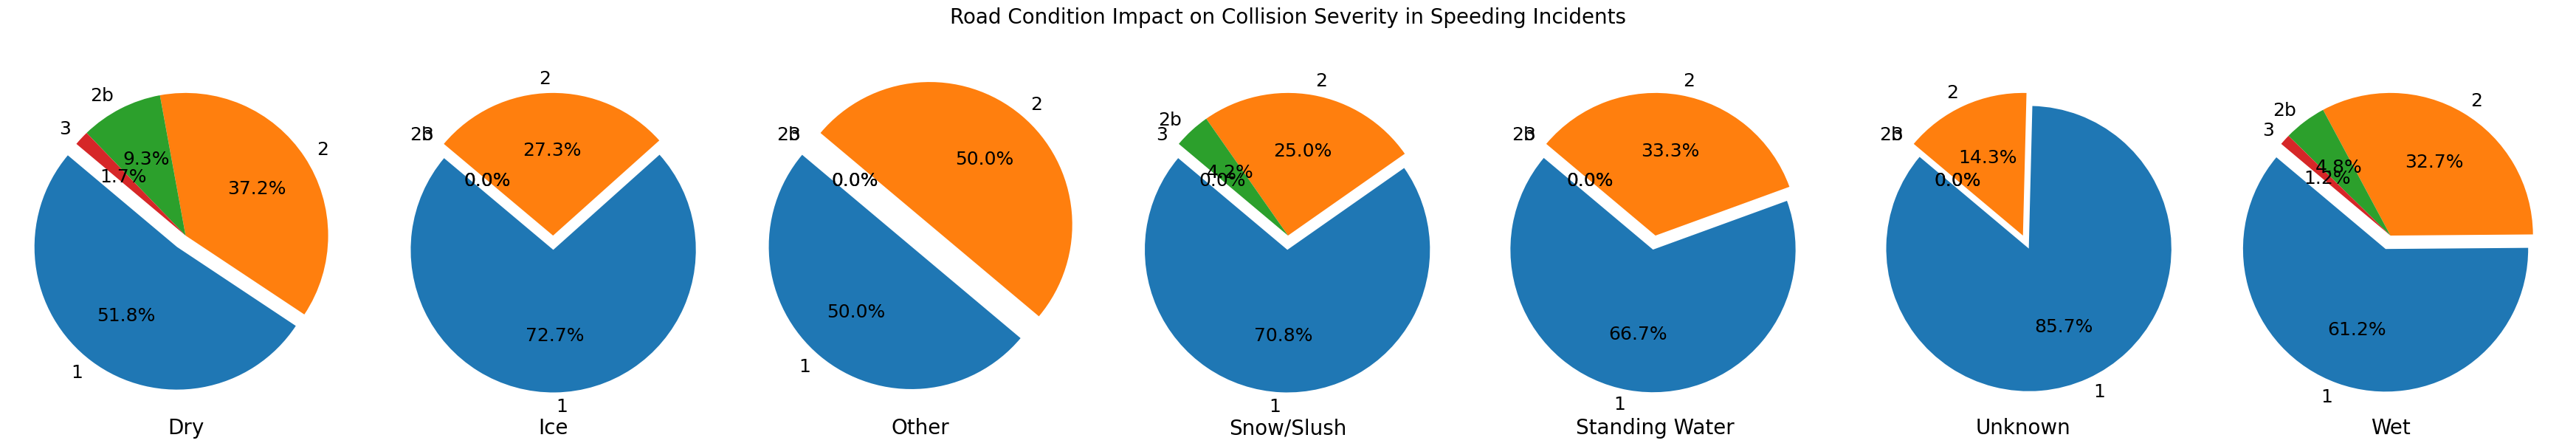

In [ ]:
# List of arguments to pass for plot
args = [speeding_df,
        "ROADCOND",
        "SEVERITYCODE",
        "Road Condition Impact on Collision Severity in Speeding Incidents"]

visualize_bar_plot(*args)
visualize_pie_chart(*args)

#### 3.3.2 Stacked Bar Chart

A **stacked bar chart** is a powerful way to visualize **multivariate relationships** when dealing with **categorical variables**. It allows us to compare **subgroups within a category**, stacked on top of each other — so we can see both the **total** and the **composition** at a glance.

For example, we can analyze how **collision severity** is distributed across different **weather conditions** and **road conditions**, all in one chart.

It’s especially useful for:

* Showing **proportions within categories**
* Comparing how a third variable changes across two others
* Spotting **dominant trends** and **anomalies** at a glance


In [ ]:
def plot_stacked_bar(df, x_col, hue_col, title, figsize=(10, 6), colormap='Set1'):
    # Create a crosstab to count combinations
    cross_tab = pd.crosstab(index=df[x_col], columns=df[hue_col])

    # Plot
    cross_tab.plot(kind='bar', stacked=True, figsize=figsize, colormap=colormap)
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel("Number of Collisions")
    plt.xticks(rotation=45)
    plt.legend(title=hue_col)
    plt.tight_layout()
    plt.show()

**🚨 Visualizing the Distribution of Vechicle Collisions DUI & Speeding by Month and Severity Levels**

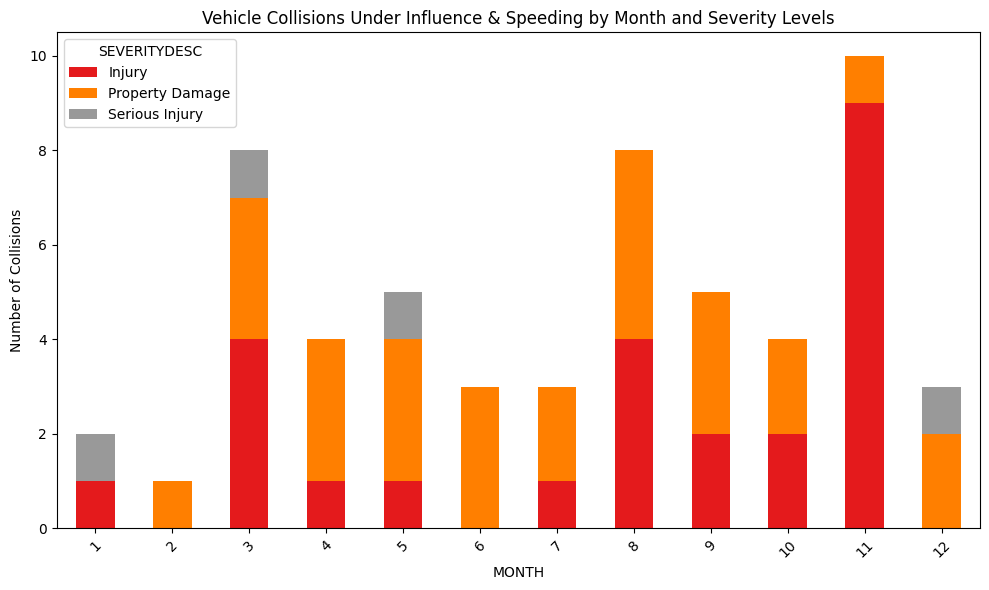

In [ ]:
# Filter the DataFrame
filtered_df = df[(df["UNDERINFL"] == "Y") & (df["SPEEDING"] == "Y")]

# Plot
plot_stacked_bar(
    filtered_df,
    x_col="MONTH",
    hue_col="SEVERITYDESC",
    title="Vehicle Collisions Under Influence & Speeding by Month and Severity Levels"
)

> After filtering further on under influenced and speeding case of collision types, serious injuries and fatality collison are started to get noticed. This visualization highlights the potentially dangerous combination of driving under the influence and speeding.

Preventing DUI and speeding is crucial due to the increased risk.



**🚨 Visualizing the Distribution of Vechicle Collisions DUI & Speeding by Time of Day and Severity Levels**

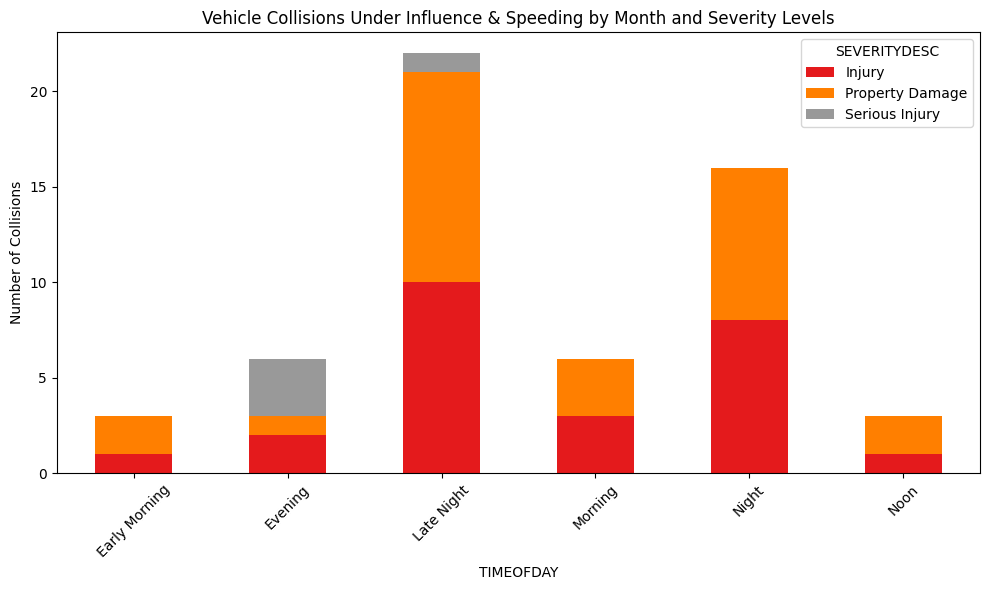

In [ ]:
# Filter the DataFrame
filtered_df = df[(df["UNDERINFL"] == "Y") & (df["SPEEDING"] == "Y")]

# Plot
plot_stacked_bar(
    filtered_df,
    x_col="TIMEOFDAY",
    hue_col="SEVERITYDESC",
    title="Vehicle Collisions Under Influence & Speeding by Month and Severity Levels"
)

This visualization highlights the severity of collisions under speeding and the influence of toxins and time of day.

- It clearly shows that a higher rate of accidents happens during night time and late-night hours, while fatalities are in the minority throughout all times of the day.

#### 3.3.3 FacetGrid Plot

A **FacetGrid plot** is a powerful data visualization tool in Seaborn for creating a grid of small, similar plots (called "facets" or "panels"). It's specifically designed to explore how the relationship between numerical variables changes when conditioned on one or two categorical variables.

**Key Strength of FacetGrid Plot**

- Reveals conditional relationships
- Flexible plotting
- Handles multiple conditions

In [ ]:
def plot_facetgrid(df, col, x_col, hue_col=None, col_wrap=3, height=4, title=None, palette='Set2'):
    g = sns.catplot(
        data=df,
        x=x_col,
        hue=hue_col,
        col=col,
        kind='count',
        col_wrap=col_wrap,
        height=height,
        aspect=1,
        palette=palette
    )

    g.set_xticklabels(rotation=45)
    g.set_titles(col_template="{col_name}")
    if title:
        plt.subplots_adjust(top=0.85)
        g.fig.suptitle(title, fontsize=16)

    plt.tight_layout()
    plt.show()

**🚨 Visualizing how collision types are distributed across different times of day**

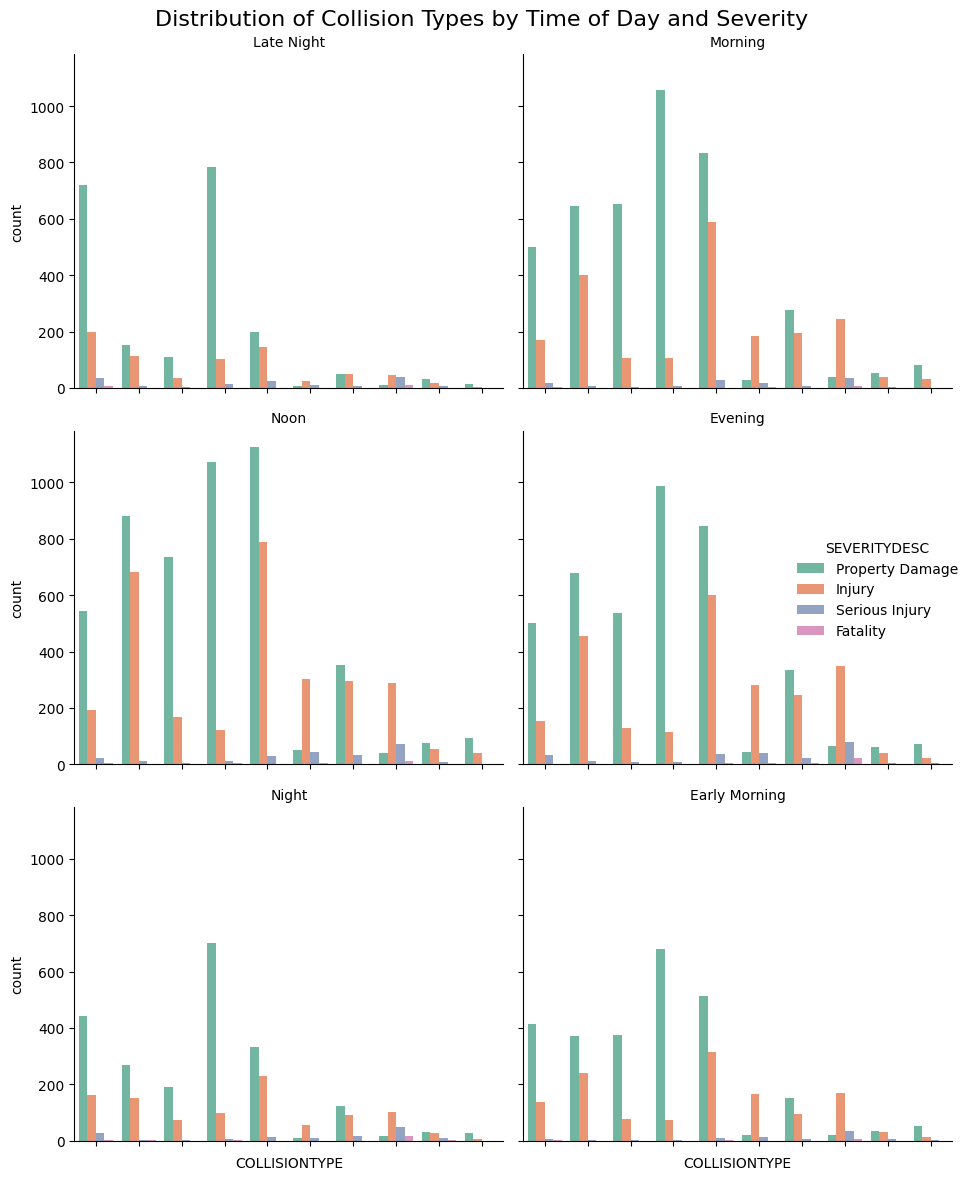

In [ ]:
plot_facetgrid(
    df=df,
    col='TIMEOFDAY',
    x_col='COLLISIONTYPE',
    hue_col='SEVERITYDESC',
    col_wrap=2,
    title='Distribution of Collision Types by Time of Day and Severity'
)

#### 3.3.4 Pearson Correlation

The **Pearson correlation coefficient** (also called Pearson’s r or simply "linear correlation") measures the **strength and direction of the linear relationship** between two or more numeric variables.

**Key Properties:**

* **Range**: from **-1** to **+1**

<center>

| Value of *r* | Interpretation                           |
| ------------ | ---------------------------------------- |
| `+1`         | Perfect **positive** linear relationship |
| `0`          | **No** linear relationship               |
| `-1`         | Perfect **negative** linear relationship |

</center>

**Formula:**

$$
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}
$$

Where,


* $x_i, y_i$ are the individual data points
* $\bar{x}, \bar{y}$ are the means of $x$ and $y$

### When to Use It?

Use **Pearson correlation** when:

* Both variables are **numeric and continuous**
* You expect a **linear** relationship
* The data is **normally distributed** (or close enough)

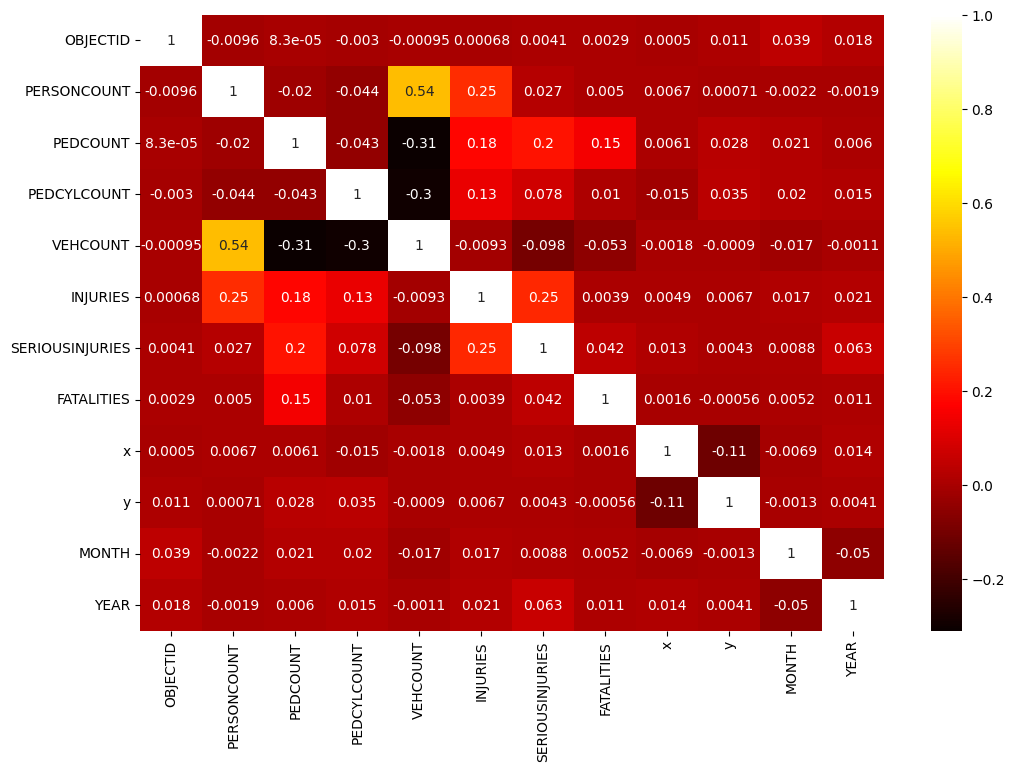

In [ ]:
plt.figure(figsize = (12, 8))
sns.heatmap(df.select_dtypes('number').corr(), cmap = 'hot', annot = True)
plt.show()

> - 0 (Dark) represents the lower correlation values which indicates weaker realtionships or -ve relationships.
>
> - 1 (Light) represents the higher correlation values which indicates higher relationships or +ve relationships.

From above correlation we can get following insights:

**Positive correlation:**

*A positive correlation means they tend to move in the same direction (up together, down together)*

- **Person Count and Vehicle Count:** A higher number of people is associated with a higher number of vehicles. This makes sense as more people likely means more traffic activity.

- **Injuries and Serious Injuries:** Collisions resulting in injuries are also more likely to result in serious injuries.

**Negative correlation:**

*A negative correlation means they move in opposite directions (one goes up, the other goes down).*

- **Vechicle Count and Pedestrian Count:** More people on the road (including drivers) are associated with fewer pedestrians. This could be because:

    - Traffic volume discourages walking due to safety concerns or a lack of pedestrian infrastructure.

    - The correlation reflects areas with different purposes. Places with high person counts might be commercial areas where people drive to, whereas areas with high pedestrian counts might be residential areas where people walk more.

- **Vehicle Count and Cyclist Count:** Similar to pedestrians, cyclists might be discouraged by higher traffic volume.

> _**NOTE:** It's important to note that correlation doesn't imply causation(cause and effect). Just because two factors appear related doesn't necessarily mean one causes the other. There could be other factors influencing both._

#### 3.3.5 Pair Plot

A **pair plot** (aka scatterplot matrix) is a visualization tool from Seaborn that shows all pairwise relationships between numerical features in a dataset. It also allows you to use hue (color coding) to represent a categorical variable.

**What it Shows:**

- Scatter plots for each pair of numerical variables.

- Histograms (or KDEs) on the diagonals to show univariate distributions.

In [ ]:
def plot_pairwise_relationships(df, numeric_cols, hue_col=None, title=None, palette='husl'):
    g = sns.pairplot(df[numeric_cols + ([hue_col] if hue_col else [])], hue=hue_col, palette=palette)

    if title:
        plt.suptitle(title, y=1.02, fontsize=16)

    plt.show()


**🚨 Visualizing Pairwise Relationships Between Collision Metrics by Severity**

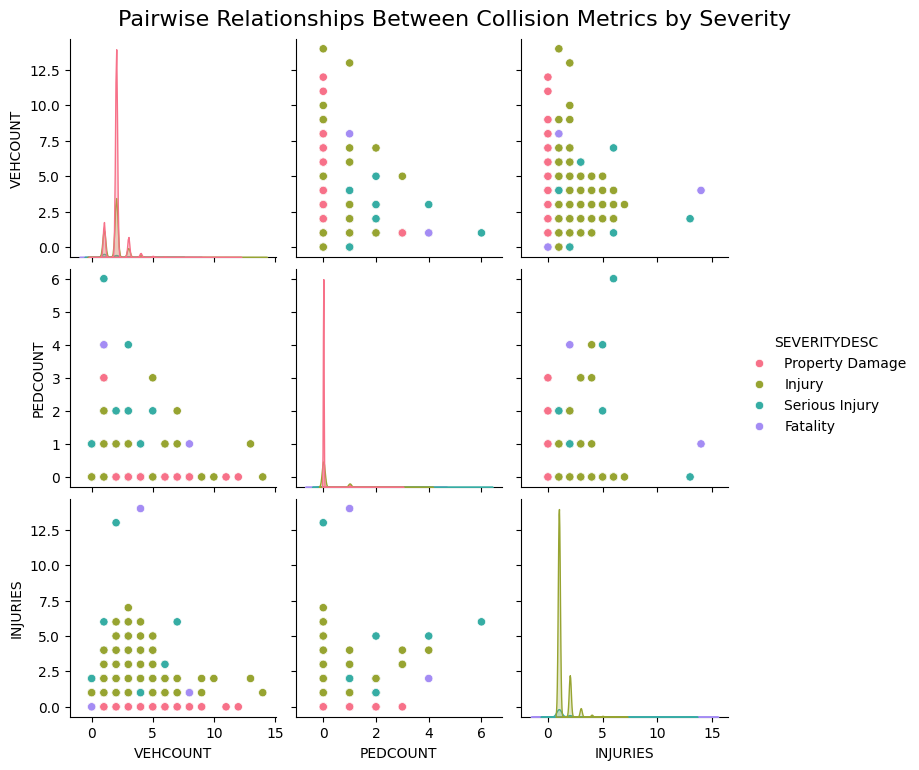

In [ ]:
plot_pairwise_relationships(
    df=df,
    numeric_cols=['VEHCOUNT', 'PEDCOUNT', 'INJURIES', 'SEVERITYCODE'],
    hue_col='SEVERITYDESC',
    title='Pairwise Relationships Between Collision Metrics by Severity'
)

**Insights from the pairwise relationships plot**

> The diagonal plots show the distribution of each metric (`VEHCOUNT`, `PEDCOUNT`, `INJURIES`) by `severity level`.

*  As the number of vehicles increases, there's a wider spread of injury counts, including higher values.

*  Pedestrian involvement is generally infrequent in these collisions.

* When pedestrian count increases, so does the potential for injuries.

* Fatal collisions don't necessarily involve a high number of vehicles or pedestrians in this view.

* The distribution of injuries is broader compared to vehicle or pedestrian counts.


#### 3.3.6 Sunburst Chart

A **Sunburst chart** is a multi-level, radial chart used to visualize hierarchical relationships — like a pie chart that has layers. It’s excellent for showing how categories and subcategories are nested.

It helps you understand how collision factors are distributed within broader categories.

**Visualizing Hierarchial Relationships Between Collision Type and Severity Level by Time**

This plot helps us visually break down:

- How collisions are distributed across different times of day

- What types of collisions are most common during each period

- And how severe those collisions tend to be

In [ ]:
# Remove rows with nulls in any path column
subset= ["TIMEOFDAY", "ROADCOND", "COLLISIONTYPE", "SEVERITYDESC"]
cleaned_df = df.dropna(subset=subset)

# Plot the Sunburst chart
fig = px.sunburst(
    data_frame=cleaned_df,
    path=subset,
    color="TIMEOFDAY",
    color_discrete_sequence=px.colors.qualitative.Pastel,
    maxdepth=-1,
    branchvalues="total",
    title="Breakdown of Collision Type and Severity Level by Time"
)

fig.update_traces(textinfo='label+percent entry')
fig.update_layout(
    margin=dict(t=30, b=10, r=10, l=10),
    width=1000,
    height=1000
)

fig.show()

**🌀 Plot Layers:**

* **1st Layer (center layer)**: `TIMEOFDAY`
* **2nd Layer**: `ROADCOND`
* **3rd Layer**: `COLLISIONTYPE`
* **4th Layer (outermost layer)**: `SEVERITYDESC`

## 4. 🌍 Extra EDA with Folium: Visualizing Collisions Geospatially

While charts like bar plots and heatmaps help us explore **patterns in collision features**, they don't show us **where** these incidents are happening.

That’s where **Folium** comes in — an interactive mapping library built on Leaflet.js that lets us **visually explore spatial patterns** in vehicle collisions across Seattle.

### Why Use Folium for EDA?

* 🗺️ **Geospatial Awareness**: It maps each collision on a real-world map.

* 🔥 **Density Visualization**: Using `HeatMap`, we can spot high-risk zones with frequent accidents.
* 📍 **Marker Clustering**: Helps avoid overcrowding by clustering nearby collision points.

By using the `x` and `y` coordinates from the dataset (which represent longitude and latitude), we can plot collision locations on an interactive map.


In [ ]:
# Download extra packages
!pip install -q folium pyproj

In [ ]:
import folium
from folium.plugins import HeatMap, FeatureGroupSubGroup
from folium.plugins import MarkerCluster

In [ ]:
df[["x", "y"]].sample(4)

x              y
68     1.278025e+06  216171.413393
22637  1.261730e+06  192489.632377
1632   1.272073e+06  227574.944669
986    1.274305e+06  223372.292121

The Seattle Department of Transportation (SDOT) commonly uses:

* **EPSG:2926** — *NAD83 / Washington North (ftUS)*

* This system uses **feet**, not degrees.
* The values represent distances **in feet** from a fixed reference point (origin).

These values help with **accurate local mapping**, especially for engineering and infrastructure work — but they aren’t human-friendly like latitude/longitude.

To use these `x`, `y` values for **Folium**, **Plotly**, or any mapping tool that expects latitude/longitude.

In [ ]:
from pyproj import Transformer
import pandas as pd

# Let's copy original DataFrame
df_converted = df.copy()

# Create the transformer
transformer = Transformer.from_crs("EPSG:2926", "EPSG:4326", always_xy=True)

df_converted = df_converted.dropna(subset=["x", "y"])   # Drop NaNs

# Apply the transformation
def convert_coords(row):
    lon, lat = transformer.transform(row["x"], row["y"])
    return pd.Series({"longitude": lon, "latitude": lat})

In [ ]:
# Create new lat/lon columns
df_converted[["longitude", "latitude"]] = df_converted.apply(convert_coords, axis=1)
df_converted[["x", "y", "longitude", "latitude"]].head(5)

x              y   longitude   latitude
0  1.275366e+06  236187.648934 -122.314158  47.637875
1  1.280244e+06  232549.364834 -122.294096  47.628159
2  1.270689e+06  202435.972355 -122.330462  47.545115
3  1.264818e+06  236358.887974 -122.356949  47.637780
4  1.281245e+06  252558.066615 -122.291573  47.683054

Now it's in `x` and `y` coordinates are in degrees.

### 4.1 Univariate Geo-Spatial Heatmap of Vehicle Involvement in Collisions

In [ ]:
df_filtered = df_converted[(df_converted["YEAR"] >= 2019)].dropna(subset=["longitude", "latitude", "VEHCOUNT"])

# Center map on mean coordinates (latitude, longitude)
center_lat = df_filtered["latitude"].mean()
center_lon = df_filtered["longitude"].mean()

center_lat, center_lon

(np.float64(47.61532035934988), np.float64(-122.32978440913813))

In [ ]:
# Create base map
sf_map = folium.Map(
    location=[center_lat, center_lon],
    zoom_start=11,  # city-level zoom
    control_scale=True,
    min_zoom=10,
    max_zoom=18,
)

# Prepare heatmap data as list of [lat, lon, weight]
heat_data = df_filtered.groupby(['latitude', 'longitude'])['VEHCOUNT'].sum().reset_index()
heat_data = heat_data[['latitude', 'longitude', 'VEHCOUNT']].values.tolist()

# Add heatmap layer
HeatMap(data=heat_data, radius=9, max_zoom=13).add_to(sf_map)

sf_map

### 4.2 Bivariate Geo-Spatial Heatmap of Vehicle Involvement during Covid lockdown period

In [ ]:
df_covid_yr = df_filtered[df_filtered['YEAR'] == 2021]

heat_data = df_covid_yr.groupby(['latitude', 'longitude'])['VEHCOUNT'].sum().reset_index()
heat_data = heat_data[['latitude', 'longitude', 'VEHCOUNT']].values.tolist()

HeatMap(data=heat_data, radius=8, max_zoom=13).add_to(sf_map)
sf_map

### 4.3 Multivariate Geo-Spatial Heatmap of Speeding Vehicle Involvement in Collisions involving Fatalities and Serious Injuries

In [ ]:
df_speeding = df_filtered[
    (df_filtered['SPEEDING'] == 'Y') &
    (df_filtered['SEVERITYCODE'].isin(['3', '2b']))
]

heat_data = df_speeding.groupby(['latitude', 'longitude'])['VEHCOUNT'].sum().reset_index()
heat_data = heat_data[['latitude', 'longitude', 'VEHCOUNT']].values.tolist()

HeatMap(data=heat_data, radius=9, max_zoom=13).add_to(sf_map)
sf_map

## 5. Summary of Data Analysis Report on Road Traffic Accidents in Seattle

<center>

<img src = "https://i.postimg.cc/Kzrq8mCS/Stock-Cake-Midnight-Accident-Scene-1747653790.jpg">
</center>

### 📌 **Bivariate & Multivariate Analysis: Seattle Collision Data**

#### 🚦 Time of Day and Severity

* **Most collisions** occur during the **afternoon** and **evening** hours.
* **Property damage** collisions dominate across all times.
* **Injury and serious collisions** follow the same daily pattern but are less frequent.

#### 🍷 Time of Day and DUI (Driving Under Influence)

* **DUI-related collisions** are most common between **8 PM and 4 AM**.
* Daytime hours see significantly fewer DUI crashes.

#### 🚨 Under Influence and Severity

* **Property damage** is again the most frequent outcome for DUI-related collisions.
* **Injury-related** DUI cases occur moderately.
* **Fatalities and serious injuries** remain rare but non-negligible under DUI conditions.

#### ⚠️ Under Influence + Speeding and Severity

* Combining **DUI and speeding** notably increases the occurrence of **serious injuries** and **fatalities**.
* Indicates a **high-risk subset** that needs focused attention.

#### 🕓 Under Influence, Speeding, Time of Day, and Severity

* **Night and late-night collisions** involving DUI & speeding have **higher severity levels**.
* Severe cases (serious injury/fatality) are more common during these hours than other times.


### 🚗 Collision Type Analysis

#### 🚘 Collision Types and Severity

* **Rear-end** and **angle** collisions are among the most frequent types.
* **Parked car** and **left-turn collisions** are common — possibly due to visibility issues or traffic patterns.
* **Head-on** collisions are rare but have a higher severity profile.
* **Pedestrian-related collisions** occur infrequently but show higher injury risk.

#### 🌃 Collision Type and Time of Day

* **Rear-end and angle collisions** are prevalent in daylight.
* **Nighttime** sees increased **property damage** and **injury collisions**, likely due to **reduced visibility**.

### 🌤️ Environmental Conditions

#### ☁️ Weather, Light, and Road Conditions

* **Most accidents** occur during **clear weather** and **daylight** — likely due to higher traffic volume.
* **Wet or icy roads** slightly increase injury collisions in **late fall and winter**.
* **Good lighting** reduces severe outcomes at night — **poor lighting** is associated with higher severity but is less common in Seattle.


### 📈 Correlation Analysis

#### 🔗 Positive Correlations

* **Person Count ↔ Vehicle Count**: More people means more cars on the road.
* **Injuries ↔ Serious Injuries**: Injury-prone collisions are more likely to escalate.
* **Injuries ↔ Fatalities**: Higher injuries correspond to higher fatal risk (weak but present).

#### 🔀 Negative Correlations

* **Vehicle Count ↔ Pedestrian Count**: Heavier traffic areas might discourage pedestrian presence.
* **Vehicle Count ↔ Cyclist Count**: Similar trend as with pedestrians, possibly due to **safety concerns**.

### 📅 Temporal Trends

#### 📆 Monthly

* **September–October** peak in **property damage** cases.
* **Winter months** see a slight rise in **injury severity**, potentially due to **slippery road conditions**.

#### 📉 Yearly

* **2020** shows a significant dip in all collision types — aligns with **COVID-19 lockdowns**.
* Gradual recovery in **2021–2022**; **Severity Code 1** remains dominant throughout.

### 🌞 Sunburst Chart – Hierarchical Insights

* Helps explore **collision severity** across **time of day** and **collision types**.
* Reveals how different collision types and severity levels distribute across **daily time windows**.

### 🔍 Summary Takeaway (EDA View)

* Seattle collisions are **consistent in volume** with strong daily and seasonal patterns.
* **DUI and speeding at night** are clear risk multipliers.
* Injury severity is influenced by a mix of **environmental** and **behavioral** factors.
* Strategic focus should go to **nighttime safety**, **DUI enforcement**, and **weather-specific driving awareness**.

**Additional Insights:**

* This data analysis provides valuable insights for improving road safety.
* By understanding patterns and risk factors, targeted interventions can be implemented, such as infrastructure development, targeted enforcement, and public awareness campaigns.
* Future analysis could explore additional factors like weather conditions, road surface quality, and driver demographics.